# Project: Wrangling and Analyze Data

### Introduction
Real-world data rarely come clean. Using Python and its libraries, we will gather data from various sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

We will be wrangling the dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. Why? Because "they're good dogs Brent."

__The project consists of the steps listed below:__
- 1: Gathering data
- 2: Assessing data
- 3: Cleaning data
- 4: Storing data
- 5: Analyzing, and visualizing data
- 6: Reporting


In [653]:
#Import all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

from tweepy import OAuthHandler
from timeit import default_timer as timer

from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
import matplotlib.dates as mdates

import time
import datetime
import random
from scipy import stats

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [654]:
# Read in the csv file
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [655]:
# Store url
breed_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


In [656]:
# Use the requests.get()to download the tweet image prediction
breed_prediction_gets = requests.get(breed_prediction_url)

with open('image_predictions.tsv', 'wb') as f:
    f.write(breed_prediction_gets.content)


In [657]:
# Import predicted breeds file
breed_prediction = pd.read_csv("image_predictions.tsv", sep='\t')


In [658]:
# Examine the sample of df
breed_prediction.sample(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1198,740699697422163968,https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg,1,lawn_mower,0.878863,False,swing,0.024535,False,barrow,0.019577,False
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [659]:
tweet_data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_data = tweet_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_data = tweet_data.reset_index(drop=True)


In [660]:
# Inspect data
tweet_data.head(3)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [661]:
# Inspect data
twitter_archive.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [662]:
# Print data information
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [663]:
# Print df columns 
twitter_archive.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [664]:
# Print unique rating numerator
twitter_archive.rating_numerator.unique()


array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [665]:
# Print unique rating denominator
twitter_archive.rating_denominator.unique()


array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [666]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [667]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


### Quality issues

#### df: twitter_archive


1.The column "timestamp" has an object data type.

2.Data Frame contains retweeting information.

3.Redundant columns related to retweets.

4.Unneeded columns.

5.The column "rating_numerator" has a  broad range of values.

6.The column "rating_denominator" has a  broad range of values.

7.The column "name" contains not-name values: such, a, quite, not, one, just, an, his, all, old, the.

8.The column "name" has None values. 

### Tidiness issues
#### df: twitter_archive
1.Each dogs' types have separate columns. 

2.Absence of uniform data frame.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [668]:
# Make copies of original pieces of data
twitter_df = twitter_archive.copy()
image_df = breed_prediction.copy()
retweet_df = tweet_data.copy()


### Issue #1: The column "timestamp" has an object data type. 

#### Define: Date and time data have to be in DateTime format. 

#### Code

In [672]:
# Convert 'timestamp' to a date-time
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'])


#### Test

In [673]:
twitter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Data Frame contains retweeting information.

#### Define: 
The columns "in_reply_to_status_id', "in_reply_to_user_id", "retweeted_status_id', "retweeted_status_user_id", 	"retweeted_status_timestamp" contain unnecessary information about retweets. But we can't just drop them; first, we would select original tweets rows. 

#### Code

In [674]:
# Count number of retweets
twitter_df.in_reply_to_status_id.count()


78

In [675]:
# Select original rows (without retweets)
twitter_df = twitter_df[twitter_df.in_reply_to_status_id.isnull()]


#### Test

In [676]:
# Count number of retweets
twitter_df.in_reply_to_status_id.count()


0

### Issue #3: Redundant columns related to retweets.

#### Define: 
The columns "in_reply_to_status_id', "in_reply_to_user_id", "retweeted_status_id', "retweeted_status_user_id", 	"retweeted_status_timestamp" contain unnecessary information about retweets. Now we can drop them.  

#### Code

In [677]:
# Drop retweets related columns
retweets_col = ["in_reply_to_status_id", 
                "in_reply_to_user_id", 
                "retweeted_status_id", 
                "retweeted_status_user_id", 
                "retweeted_status_timestamp"]

twitter_df = twitter_df.drop(retweets_col, axis = 1)


#### Test

In [678]:
# Print df columns
twitter_df.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #4: Unneeded columns.

#### Define: 
The column "source" and "expanded_urls" play no roles in the current analysis and make a visual noise. The best way is to drop them.

#### Code

In [679]:
# Drop "source", "expanded_urls" columns
twitter_df = twitter_df.drop(["source", "expanded_urls"], axis = 1)


#### Test

In [680]:
twitter_df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


### Issue #5: The column "rating_numerator" has a  broad range of values.

#### Define: 
Since "they're good dogs, Brent" numerator can't be less than 10. Also, numerators more than 20 look like outliers, and we will exclude them. 


#### Code

In [681]:
# Select rating_numerator equal to or greater than 10
twitter_df = twitter_df.query('rating_numerator >=10')


In [682]:
# Select rating_numerator equal to or less than 20
twitter_df = twitter_df.query('rating_numerator <=20')


#### Test

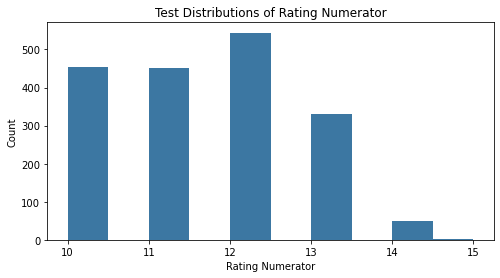

In [711]:
fig, ax = plt.subplots(figsize =(8,4))
ax.hist(twitter_df.rating_numerator, color = "#3c77a2")

ax.set_title('Test Distributions of Rating Numerator')
ax.set_xlabel('Rating Numerator')
ax.set_ylabel('Count')
plt.show();



Test Distributions of Rating Numerator shows that the numerator range is between 10 and 15, which means the code works correctly.

### Issue #6: The column "rating_denominator" has a broad range of values.

#### Define: 
"These ratings almost always have a denominator of 10." We will select rows with the denominator of 10.

#### Code

In [684]:
twitter_df.rating_denominator.unique()

array([10])

Since we removed the rows in the previous issue, now we have denominators of 10s. 

### Issue #7: The column "name" contains not-name values: such, a, quite, not, one, just, an, his, all, old, the.

#### Define: 
Sometimes neural networks took not-name words from the tweets. As a result, we have a "name" like: "such, a, quite, not, one, just, an," etc. To fix that, we will replace all lowercase words with NaN.

#### Code

In [685]:
# Replace lowercase words with NaN (np.nan)
twitter_df.loc[twitter_df.name.str.islower().fillna(False),'name']=np.nan


#### Test

In [686]:
twitter_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2339        None
2343        None
2345         NaN
2348         NaN
2350         NaN
Name: name, Length: 1831, dtype: object

### Issue #8: The column "name" has None values. 

#### Define:
As in Issue #7, we will replace None values with NaN.

#### Code

In [687]:
# Replace None with NaN (np.nan)
twitter_df["name"] = twitter_df["name"].replace("None", np.nan)


#### Test

In [688]:
twitter_df["name"].value_counts()

Charlie      12
Oliver       10
Cooper       10
Lucy         10
Bo            9
             ..
Lolo          1
Sprinkles     1
Cupid         1
Filup         1
Bruiser       1
Name: name, Length: 789, dtype: int64

### Tidiness issues
### Issue #9: Each dogs' types have separate columns. 


#### Define: It is redundant to have columns for each stage of dogs.  One column with a dog's phase would be enough. 

#### Code: 

In [689]:
# Create one dog's type column instead of 4
twitter_df.loc[twitter_df['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
twitter_df.loc[twitter_df['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
twitter_df.loc[twitter_df['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
twitter_df.loc[twitter_df['puppo'] == 'puppo', 'dog_stage'] = 'puppo'


In [690]:
# Drop the "doggo","floofer","pupper","puppo" columns
twitter_df = twitter_df.drop(["doggo","floofer","pupper","puppo"], axis = 1)


#### Test:

In [691]:
twitter_df.sample(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2135,670061506722140161,2015-11-27 02:08:07+00:00,This is Liam. He has a particular set of skill...,11,10,Liam,NaN
1465,694352839993344000,2016-02-02 02:53:12+00:00,Meet Oliviér. He takes killer selfies. Has a d...,10,10,Oliviér,NaN


### Issue #10: Absence of uniform data frame

#### Define: All df have to merge for further analysis.

In [692]:
retweet_df["tweet_id"] = retweet_df["tweet_id"].astype(int)


#### Code:

In [693]:
# Merge the data frames together based on their common columns: "tweet_id"
master_df = twitter_df.merge(image_df, how = "inner", on = "tweet_id")
master_df = master_df.merge(retweet_df, how = "inner", on = "tweet_id")


#### Test:

In [696]:
master_df.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1520,669393256313184256,2015-11-25 05:52:43+00:00,Meet Ronduh. She's a Finnish Checkered Blitzkr...,10,10,Ronduh,NaN,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True,83,383
1275,679777920601223168,2015-12-23 21:37:40+00:00,This is Rinna. She's melting. 10/10 get inside...,10,10,Rinna,pupper,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True,1281,3390
1375,674447403907457024,2015-12-09 04:36:06+00:00,This pupper just wants a belly rub. This puppe...,10,10,NaN,pupper,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074819,True,393,1137


In [697]:
master_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [720]:
master_df.shape


(1619, 20)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [386]:
# Save "master_df" to a csv file called "twitter_archive_master.csv" using the to_csv() method
master_df.to_csv("twitter_archive_master.csv",index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [387]:
df = pd.read_csv("twitter_archive_master.csv")


### Q1: What are the most common breeds found by the neural network?

To answer this question, we will use the __value_counts()__ function for each prediction and visualize the __five__ most common breeds with __bar plots.__

In [712]:
def plot_bar(data, xlabel, ylabel, title):
    """Get the data and plot vertical bars

    Args:
      data (pandas DataFrame): The DataFrame with specific columns to plot.
      xlabel (str): The label for x axis.
      ylabel (str): The label for y axis.
      title (str): The title for the plot.
      period (strftime) : The period of time


    Returns:
      plot bars
    """
    # Plotting data
    ax = data.plot.bar(figsize=(9,4), color = "#3c77a2")

    # Set labels and legend
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=15)
    
    plt.xticks(rotation=45)

    ax.legend(loc='best')
    plt.rc('legend', fontsize=12)

    # Patches is everything inside of the chart
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.0f}'

        # ax.text(x, y, text)
        label_x = x + width/2
        label_y = y + height/2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(
                label_x,
                label_y,
                label_text,
                ha='center',
                va='center',
                fontsize=13
                )

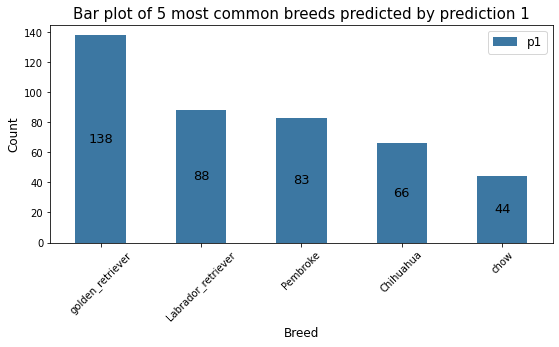

In [713]:
plot_bar(df['p1'].value_counts()[:5],
        "Breed", 
        "Count",
        "Bar plot of 5 most common breeds predicted by prediction 1")

Bar plot of 5 most common breeds predicted by prediction 1 shows that the most predictable breed is Golden Retriever. Golden Retriever has 138 predictions which are 1.56 more than following after Labrador Retriever.

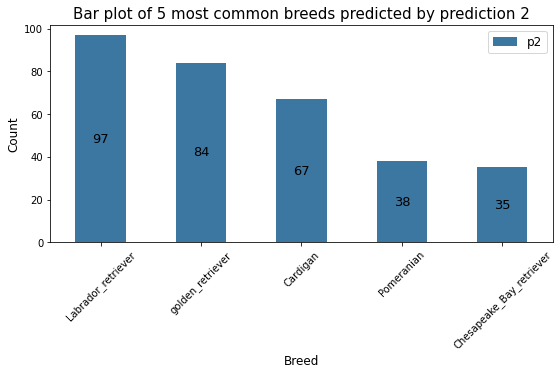

In [714]:
plot_bar(df['p2'].value_counts()[:5],
        "Breed", 
        "Count",
        "Bar plot of 5 most common breeds predicted by prediction 2")


Prediction 2 shows that Labrador Retriever is most common and has 97 predictions. Golden Retriever has 84 predictions, which is less only on 13 predictions.

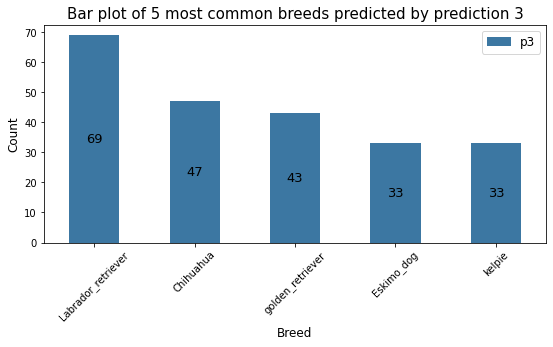

In [715]:
plot_bar(df['p3'].value_counts()[:5],
        "Breed", 
        "Count",
        "Bar plot of 5 most common breeds predicted by prediction 3")

Prediction 3 shows that Labrador Retriever is most common with 69 predictions. The following breed is Chihuahua with 47 predictions. 

__A1:__ What are the most common breeds found by the neural network? We can see that the most common breeds are Labrador Retrievers and Golden Retrievers. Those two breeds were the leader of predictions one and two. In the third plot, we can see that Chihuahua took "second place," and Golden Retriever came "third." But if we summarize all the predictions, then: Labrador Retriever - 254 predictions, Golden Retriever - 265 predictions,  Chihuahua - 113 predictions. Hence, __Golden Retriever is the most common breed.__

### Q2: What is the best time to post tweets for being more favorite? 

In [699]:
# Extracting time from timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['time'] = df['timestamp'].dt.strftime("%H:%M:%S")


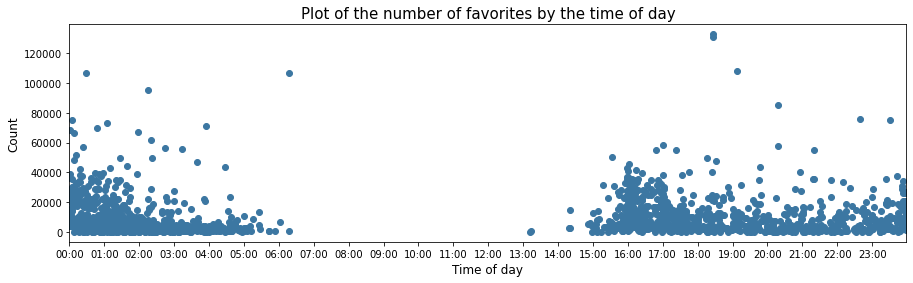

In [716]:
#Create a plot 
post_time = mdates.datestr2num(df["time"])

fig, ax = plt.subplots(figsize=(15,4))

plt.plot_date(post_time, df.favorite_count,color = "#3c77a2")

# Set the format of the major x-ticks:
majorFmt = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(majorFmt)


ax.set_xlim(pd.Timestamp('00:00'), pd.Timestamp('23:59'))
ax.set_xlabel("Time of day", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Plot of the number of favorites by the time of day", fontsize=15)

plt.show()



The plot shows that the best time for posting tweets is between 12 am to 2 am, and between 4 pm and 5 pm.

__A2:__ If we consider the best time for posting to make the most favorable tweet, the time between 12 am to 2 am and between 4 pm and 5 pm would be good.  Also, the plot shows that the time between 5 am to 3 pm is dead time for posting tweets.

### Q3: Is there a correlation between retweet_count and favorite_count? 

We will run the __Pearson correlation test__ using __scipy.stats.pearsonr(x, y)__ function to answer this question. The function returns the Pearson correlation coefficient and p-value for testing non-correlation. The Pearson correlation test specifies whether a linear relationship exists between two variables. Highly correlated variables have a Pearson correlation coefficient near 1  or -1. A value near 0 means the two variables are not linearly correlated.

In [515]:
# Calculate the Pearson correlation  between retweet_count and favorite_count
corr = stats.pearsonr(df.retweet_count, df.favorite_count)
print(corr)


(0.7785519545396546, 0.0)


The size of a correlation of 0.77 shows a __high positive correlation.__

####  Let's make a scatter plot and explore the correlation.

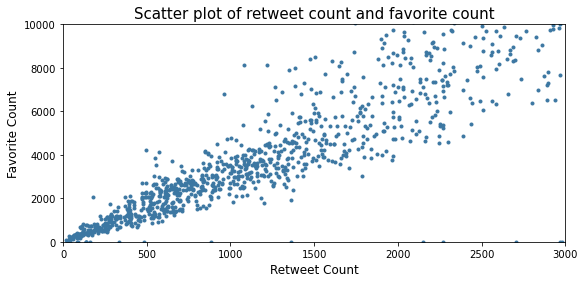

In [717]:
# Make a scatter plot
fig, ax = plt.subplots(figsize =(9,4))

ax = plt.plot(df.retweet_count, 
              df.favorite_count,
              marker='.', 
              linestyle='none',
              color = "#3c77a2")

# Label the axes
ax = plt.xlabel('Retweet Count', fontsize=12)
ax = plt.ylabel('Favorite Count', fontsize=12)
ax = plt.title ("Scatter plot of retweet count and favorite count", fontsize=15)

plt.xlim(0, 3000)
plt.ylim(0, 10000)

# Show the result
plt.show()

We can see a highly positive correlation between retweet count and favorite count on the scatter plot. The correlation is strong between 0 and 1500 retweet count, but it is not so obvious after it. 

__A3:__ Between retweet count and favorite count exist __positive linear correlation.__ Pearson correlation test shows coefficients of 0.77, which is a strong correlation. Positive linear correlation also confirms the scatter plot, but on the plot well noticeable how after 1500 retweets, correlation gets not so tight and noisier.  
